In [1]:
%matplotlib inline
import numpy as np
from lsst.sims.photUtils import Sed, Bandpass
from gaia_spec import lsst_filters
import matplotlib.pylab as plt

In [12]:
kur = np.load('Kurucz_models.npz')
spec = kur['stellar_fluxes'].copy()
properties = kur['properties'].copy()
wave = kur['wave'].copy()
kur.close()
bps = lsst_filters()
kurucz_mags = np.zeros(spec.shape[0], dtype=zip(bps.keys(), [float]*len(bps.keys())))
sed = Sed()
for i, uspec in enumerate(spec):
    sed.setSED(wave, uspec)
    fNorm = sed.calcFluxNorm(17., bps['g'])
    sed.multiplyFluxNorm(fNorm)
    for key in bps.keys():
        kurucz_mags[key][i] = sed.calcMag(bps[key])
        
#good = np.where(properties['logg'] == 4.)
#properties = properties[good]
#kurucz_mags = kurucz_mags[good]

(3000, 15000)

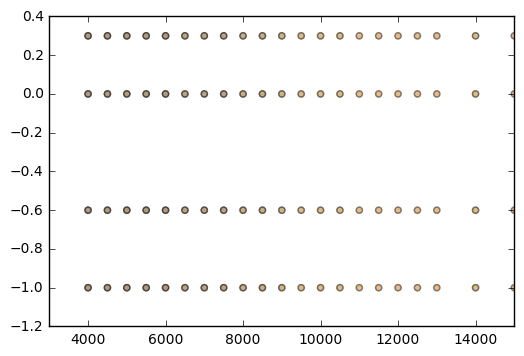

In [28]:
# Let's look at the properties
plt.scatter(properties['teff'], properties['feH'], c=properties['logg'], alpha=.1)
plt.xlim([3000,15000])

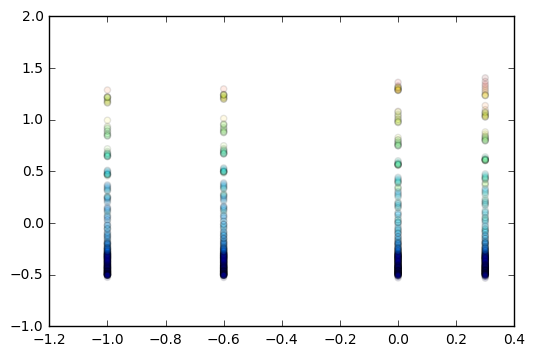

In [13]:
plt.scatter(properties['feH'], kurucz_mags['g']-kurucz_mags['r'], c=kurucz_mags['u']-kurucz_mags['g'], alpha=.1)

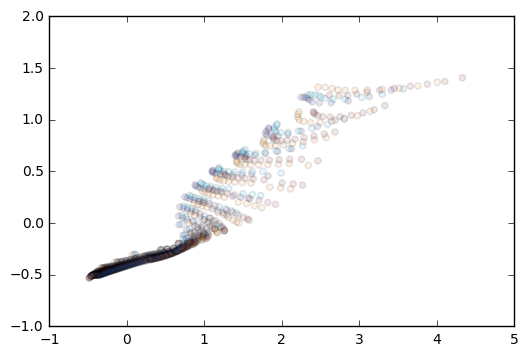

In [14]:
plt.scatter(kurucz_mags['u']-kurucz_mags['g'],kurucz_mags['g']-kurucz_mags['r'], c=properties['feH'], alpha=.1)

In [34]:
g_r = kurucz_mags['g']-kurucz_mags['r']
good = np.where( (g_r < 0.4) & (g_r > 0.29) & (properties['logg'] >=3))[0]
good

array([828, 829, 832, 833, 836, 837, 840, 841, 844, 845, 875, 879, 882,
       883, 886, 887])

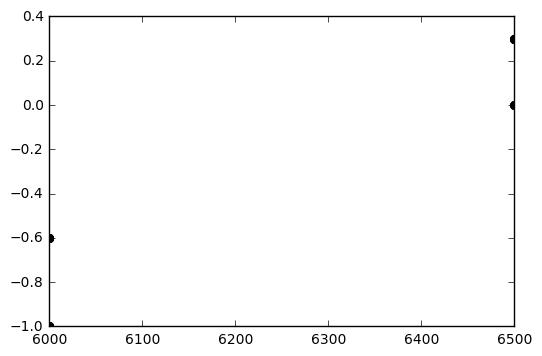

In [35]:
plt.plot(properties['teff'][good], properties['feH'][good], 'ko')

In [33]:
sun = np.where((properties['logg'] == 4.5) & (properties['teff'] == 6500) & (properties['feH'] == 0))
g_r[sun]

array([ 0.29550743])

16